In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Time Series Analysis using XGBoost\airline.csv')
data.head()

,Date,Passengers
0,01-01-1949,112
1,01-02-1949,118
2,01-03-1949,132
3,01-04-1949,129
4,01-05-1949,121


In [2]:
data.shape

(144, 2)

In [3]:
data.columns

Index(['Date', 'Passengers'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [6]:
data.isnull().sum()

Date          0
Passengers    0
dtype: int64

In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Passengers
0,1949-01-01,112
1,1949-01-02,118
2,1949-01-03,132
3,1949-01-04,129
4,1949-01-05,121


In [8]:
data_new = data.set_index('Date')
data_new.head()

,Passengers
Date,
1949-01-01,112
1949-01-02,118
1949-01-03,132
1949-01-04,129
1949-01-05,121


In [9]:
split_date = '01-Dec-1957'
data_train = data_new.loc[data_new.index <= split_date].copy()
data_test = data_new.loc[data_new.index > split_date].copy()

In [10]:
data_train.shape

(108, 1)

In [11]:
data_test.shape

(36, 1)

In [12]:
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [13]:
X_train, y_train = create_features(data_train, label='Passengers')
X_test, y_test = create_features(data_test, label='Passengers')
X_train

C:\Users\SHREE\AppData\Local\Temp/ipykernel_6744/2787707406.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear
C:\Users\SHREE\AppData\Local\Temp/ipykernel_6744/2787707406.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
1949-01-01,0,5,1,1,1949,1,1,53
1949-01-02,0,6,1,1,1949,2,2,53
1949-01-03,0,0,1,1,1949,3,3,1
1949-01-04,0,1,1,1,1949,4,4,1
1949-01-05,0,2,1,1,1949,5,5,1
...,...,...,...,...,...,...,...,...
1957-01-08,0,1,1,1,1957,8,8,2
1957-01-09,0,2,1,1,1957,9,9,2
1957-01-10,0,3,1,1,1957,10,10,2


In [14]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

C:\Users\SHREE\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [15]:
reg = xgb.XGBRegressor(n_estimators=1000)

In [16]:
reg.fit(X_train, y_train,
eval_set=[(X_train, y_train), (X_test, y_test)],
early_stopping_rounds=50,
verbose=False)

C:\Users\SHREE\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [17]:
print("Training Accuracy :", reg.score(X_train, y_train))

Training Accuracy : 0.9999624598552331


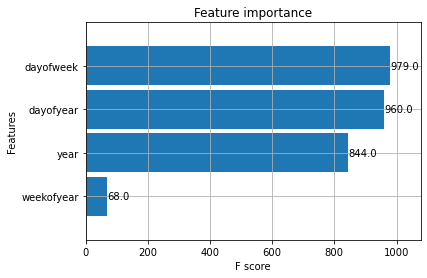

In [18]:
_ = plot_importance(reg, height=0.9)

C:\Users\SHREE\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


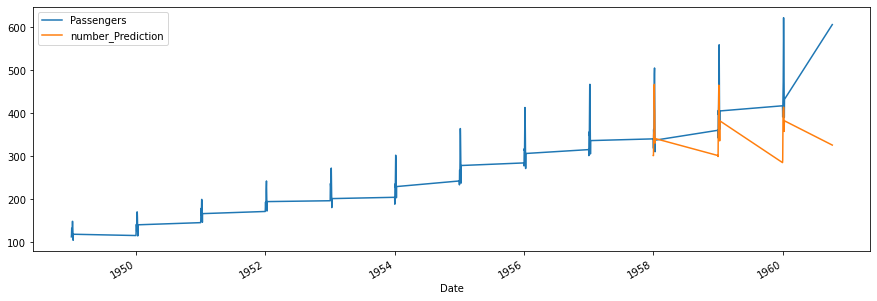

In [19]:
data_test['number_Prediction'] = reg.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

_ = data_all[['Passengers','number_Prediction']].plot(figsize=(15, 5))